<a href="https://colab.research.google.com/github/TA-PP/SKT-FLY-AI/blob/main/FLY_Day18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fastfood Classification 과제


In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/mydrive")

Mounted at /content/mydrive


In [ ]:
# 압축파일 경로
%cd /content/mydrive/MyDrive/datasets

!unzip -qq /content/mydrive/MyDrive/datasets/fastfood.zip

/content/mydrive/MyDrive/datasets


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras_preprocessing

from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
# 경로 지정하기
burger_dir = os.path.join('/content/drive/MyDrive/datasets/fastfood/Train/Burger')
chicken_dir = os.path.join('/content/drive/MyDrive/datasets/fastfood/Train/Crispy Chicken')
donut_dir = os.path.join('/content/drive/MyDrive/datasets/fastfood/Train/Donut')
dog_dir = os.path.join('/content/drive/MyDrive/datasets/fastfood/Train/Hot Dog')
pizza_dir = os.path.join('/content/drive/MyDrive/datasets/fastfood/Train/Pizza')
taquito_dir = os.path.join('/content/drive/MyDrive/datasets/fastfood/Train/Taquito')

burger_files = os.listdir(burger_dir)
chicken_files = os.listdir(chicken_dir)
donut_files = os.listdir(donut_dir)
dog_files = os.listdir(dog_dir)
pizza_files = os.listdir(pizza_dir)
taquito_files = os.listdir(taquito_dir)

print('Total number of training Burger images:', len(burger_files))
print('Total number of training Crispy Chicken images:', len(chicken_files))
print('Total number of training Donut images:', len(donut_files))
print('Total number of training Hot Dog images:', len(dog_files))
print('Total number of training Pizza images:', len(pizza_files))
print('Total number of training Taquito images:', len(taquito_files))

Total number of training Burger images: 1500
Total number of training Crispy Chicken images: 1500
Total number of training Donut images: 1500
Total number of training Hot Dog images: 1500
Total number of training Pizza images: 1500
Total number of training Taquito images: 1500


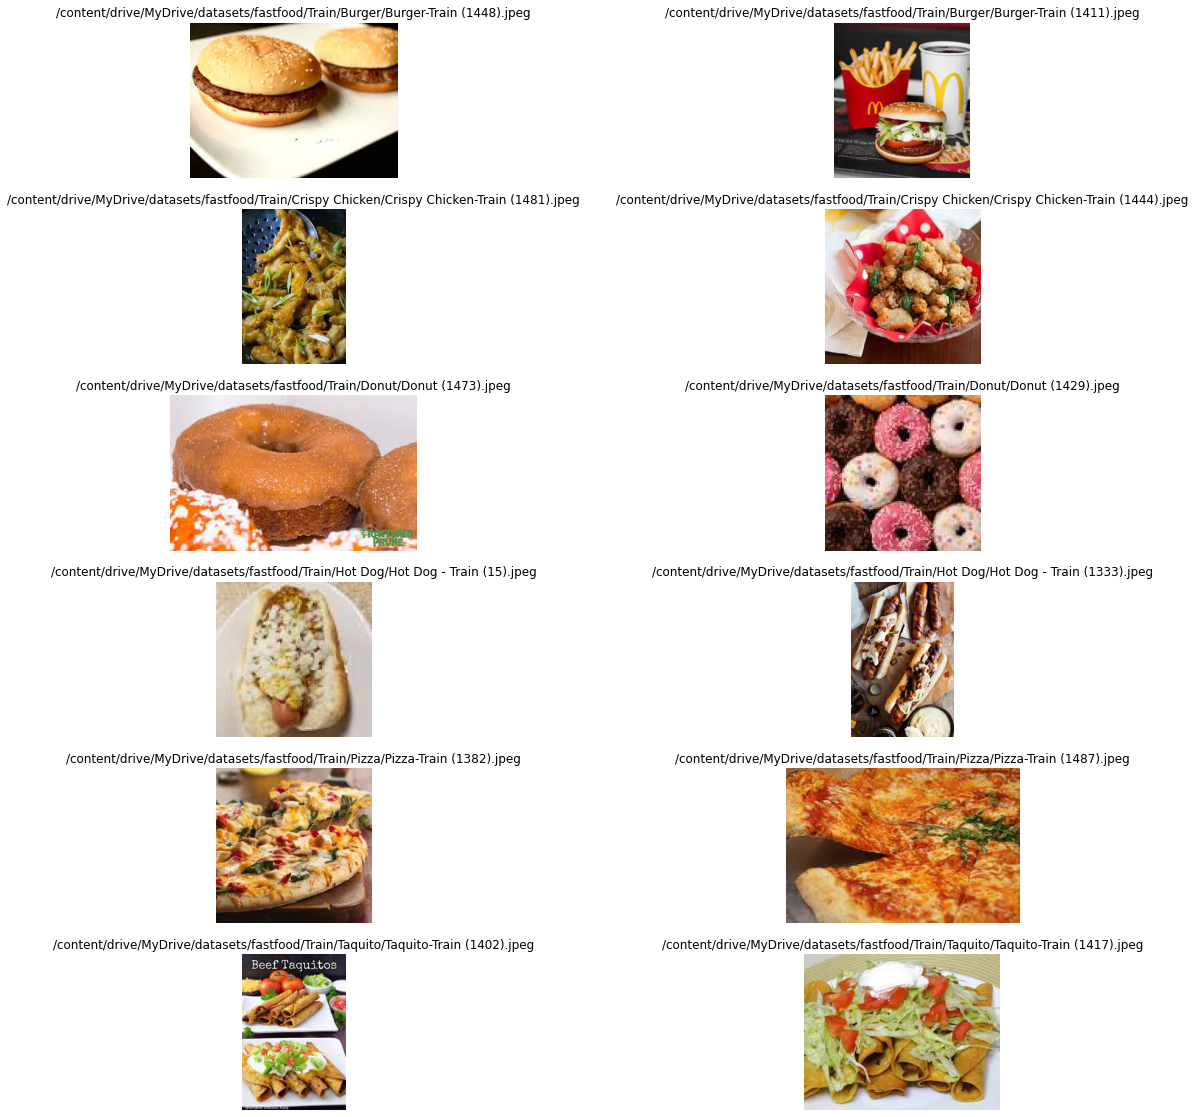

In [3]:
# 이미지 확인하기
pic_index = 2

next_burger = [os.path.join(burger_dir, fname) for fname in burger_files[pic_index-2:pic_index]]
next_chicken = [os.path.join(chicken_dir, fname) for fname in chicken_files[pic_index-2:pic_index]]
next_donut = [os.path.join(donut_dir, fname) for fname in donut_files[pic_index-2:pic_index]]
next_dog = [os.path.join(dog_dir, fname) for fname in dog_files[pic_index-2:pic_index]]
next_pizza = [os.path.join(pizza_dir, fname) for fname in pizza_files[pic_index-2:pic_index]]
next_taquito = [os.path.join(taquito_dir, fname) for fname in taquito_files[pic_index-2:pic_index]]

plt.figure(figsize=(20, 20))

for i, img_path in enumerate(next_burger + next_chicken + next_donut + next_dog + next_pizza + next_taquito):
    plt.subplot(6, 2, i+1)
    plt.title(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')

plt.show()

In [4]:
# 모델 구성 / 훈련하기
TRAINING_DIR = "/content/drive/MyDrive/datasets/fastfood/Train"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/datasets/fastfood/Valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(416,416),
class_mode='sparse',
batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(416,416),
class_mode='sparse',
batch_size=126
)

model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(416, 416, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The fourth convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Found 9000 images belonging to 6 classes.
Found 2000 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 414, 414, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 207, 207, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 205, 205, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 102, 102, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 128)     73856     
                                      

In [5]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1, validation_steps=3)
model.save("passion_songseungwoo_model.h5")

Epoch 1/10
 7/72 [=>............................] - ETA: 6:08 - loss: 10.8421 - accuracy: 0.1599

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


72/72 [==============================] - 589s 8s/step - loss: 2.7021 - accuracy: 0.1994 - val_loss: 1.7155 - val_accuracy: 0.2804
Epoch 2/10
72/72 [==============================] - 435s 6s/step - loss: 1.7751 - accuracy: 0.2590 - val_loss: 1.5876 - val_accuracy: 0.3519
Epoch 3/10
72/72 [==============================] - 399s 6s/step - loss: 1.7020 - accuracy: 0.2988 - val_loss: 1.5194 - val_accuracy: 0.4312
Epoch 4/10
72/72 [==============================] - 384s 5s/step - loss: 1.6409 - accuracy: 0.3540 - val_loss: 1.5151 - val_accuracy: 0.3995
Epoch 5/10
72/72 [==============================] - 377s 5s/step - loss: 1.5573 - accuracy: 0.4022 - val_loss: 1.5397 - val_accuracy: 0.4524
Epoch 6/10
72/72 [==============================] - 365s 5s/step - loss: 1.4904 - accuracy: 0.4381 - val_loss: 1.5693 - val_accuracy: 0.4524
Epoch 7/10
72/72 [==============================] - 357s 5s/step - loss: 1.3980 - accuracy: 0.4711 - val_loss: 1.1222 - val_accuracy: 0.5979
Epoch 8/10
72/72 [======

### OpenCV